In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
from qiskit.visualization import plot_distribution
#from qiskit.circuit.library import Diagonal
#from qiskit.circuit.library import RGQFTMultiplier
#from qiskit.circuit.library import Permutation
#from qiskit.circuit.library import QFT

#import numpy as np
#import matplotlib.pyplot as plt
#from qiskit.aqua.components.uncertainty_models import NormalDistribution, UniformDistribution, LogNormalDistributio
#from qiskit_finance.circuit.library.probability_distributions import NormalDistribution, UniformDistribution,LogNormalDistribution

In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)

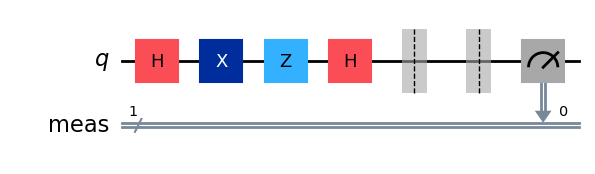

In [3]:
#Define the circuit

qc = QuantumCircuit(1) #N=1 qubit. N = 1 classical bit


#building the circuit

#put q0 in superposition

qc.h(0)

#Apply error

#
qc.x(0) #Bit flip error
#
qc.z(0) #Phase flip error
#
#qubit out of superposition

qc.h(0)

#Apply a barrier

qc.barrier()

#Messure...

qc.measure_all() #This measure must have errors

#print circuit

qc.draw("mpl")



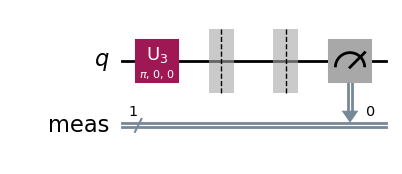

In [4]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

In [5]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
#counts
print('RESULT ', counts)

RESULT  {'1': 1000}


The gates X and Z above mimics the error

Next step we aill correct the error using the Shor`s procedure

##########Shor Code Starts Here###################

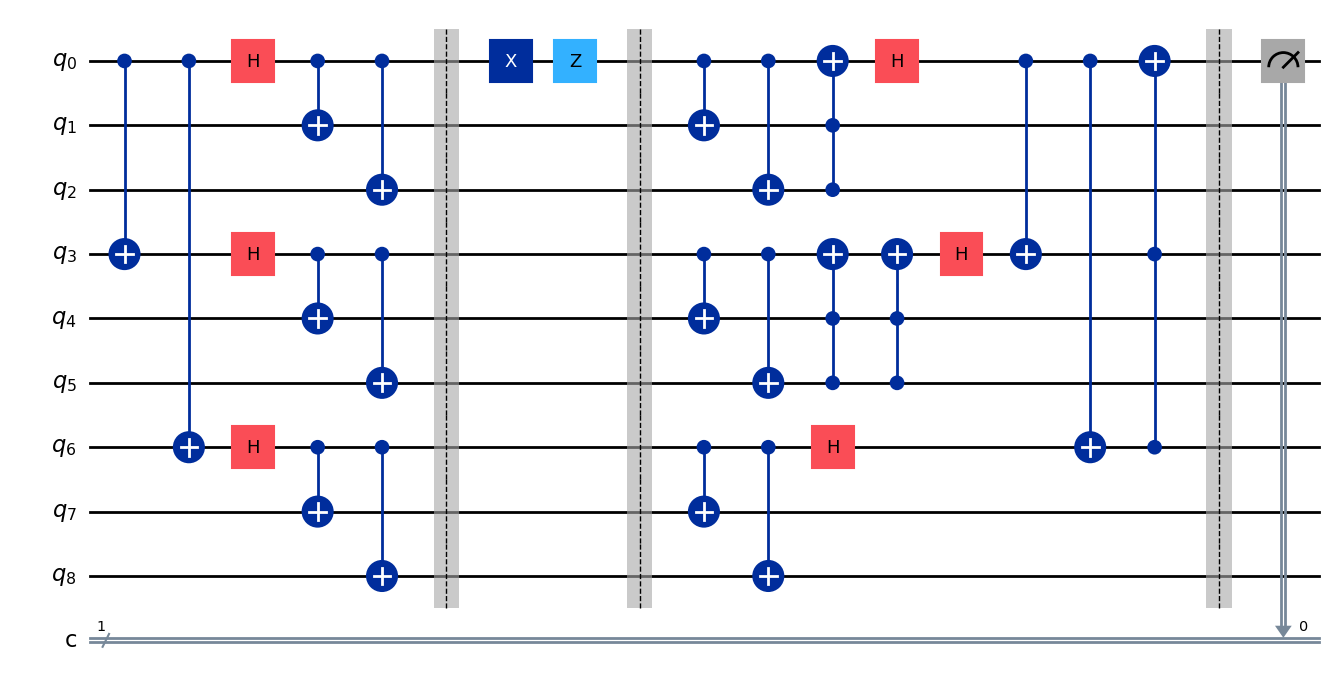

In [6]:
#Redefining the circuit

qc = QuantumCircuit(9,1) #9 qubits, one of them (q0) is where the errors are (bit and phase flips erros) 
                            #we need 8 aux qubits that will correct the errors



#building the new circuit

#Apply CNOT in q0 and q3

qc.cx(0,3)

#Apply CNOT in q0 and q6

qc.cx(0,6)

#put q0, q3 and q6 in superposition

qc.h(0)
qc.h(3)
qc.h(6)

#Apply CNOT in q0 and q1

qc.cx(0,1)

#Apply CNOT in q3 and q4

qc.cx(3,4)

#Apply CNOT in q6 and q7

qc.cx(6,7)

#Apply CNOT in q0 e q2

qc.cx(0,2)

#Apply CNOT in q3 and q5

qc.cx(3,5)

#Apply CNOT in q6 and q8

qc.cx(6,8)

#######Add error here#########3
qc.barrier()

qc.x(0)#Bit flip
qc.z(0)#Phase flip

qc.barrier()
############################


#Apply CNOT in q0 and q1

qc.cx(0,1)

#Apply CNOT in q3 and q4

qc.cx(3,4)

#Apply CNOT in q6 and q7

qc.cx(6,7)

#Apply CNOT in q0 and q2

qc.cx(0,2)

#Apply CNOT in q3 and q5

qc.cx(3,5)

#Apply CNOT in q6 and q8

qc.cx(6,8)

#Apply Toffoli in q1, q2 and q0 to correct the error in q0

qc.ccx(1,2,0)

#Apply Toffoli in q4, q5 and q3 to correct q3-------->This is necessary to correct q0 in the future

qc.ccx(4,5,3)

#Apply Toffoli in q8, q7 and q6 to correct q6-------->This is necessary to correct q0 in the future

qc.ccx(4,5,3)

#Taking out  q0, q3 and q6 from superposition

qc.h(0)
qc.h(3)
qc.h(6)

#Apply CNOT in q0 and q3

qc.cx(0,3)

#Apply CNOt in q0 and q6

qc.cx(0,6)

#Apply toffoli in q6, q3 and q0-------------->this corrects q0

qc.ccx(6,3,0)

#Aply a barrieir

qc.barrier()

#Messure qo

qc.measure(0,0)

#print the circuit

qc.draw("mpl")

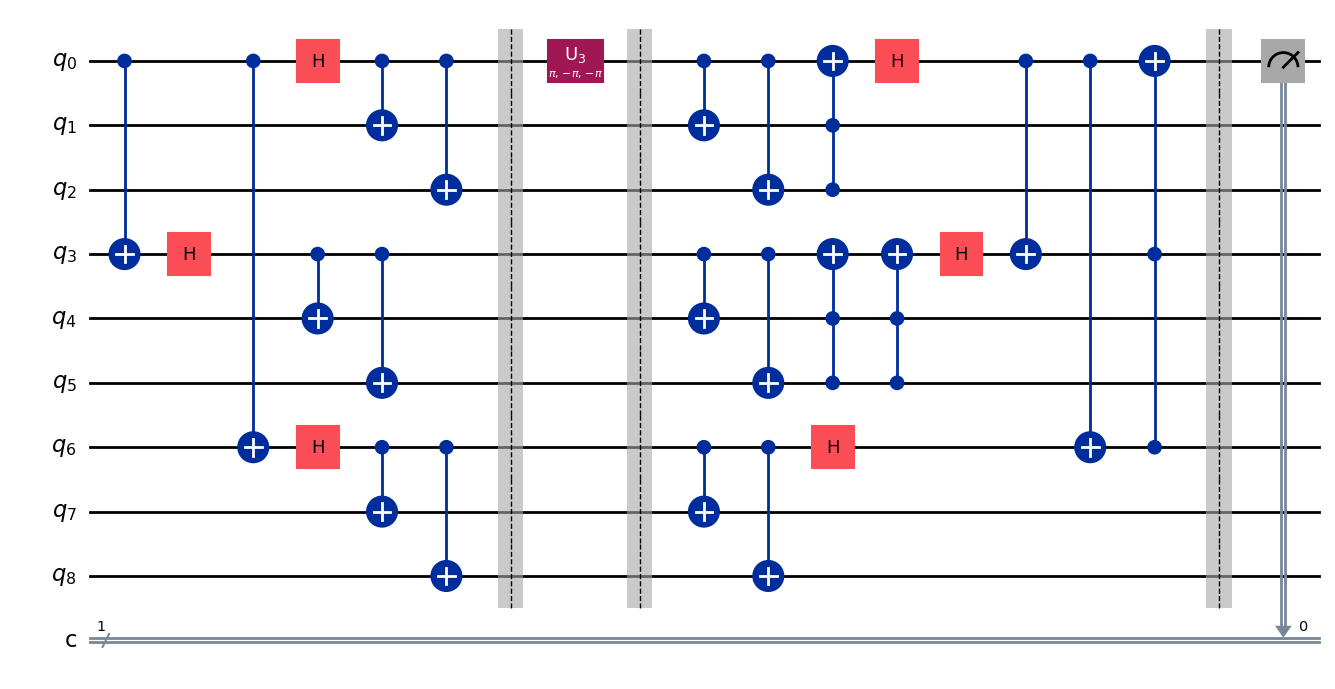

In [7]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

In [8]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.c.get_counts() #Meassuring results. According to the circuit we measure 'c'
#counts
print('RESULT ', counts)



#Execute o circuito acima para o backend definido anteriromente 1000 vezes

#job = execute(circuit, backend, shots=1000)

RESULT  {'0': 1000}


Shor code with bit and phase error corrections
-------------



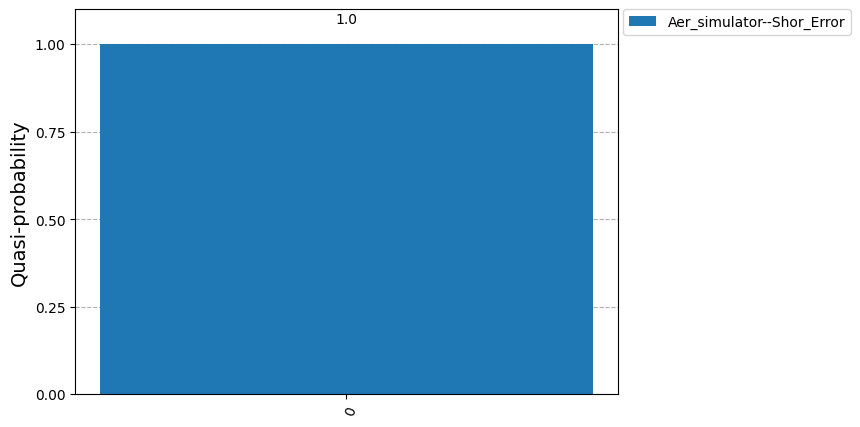

In [9]:
print('Shor code with bit and phase error corrections')
print('-------------\n')
#print(counts)

plot_distribution([counts], legend = ['Aer_simulator--Shor_Error'])

#The error was corrected 1000 times